In [1]:
from obspy.core import Stream, read
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl 
import matplotlib.colors as colors
from matplotlib.colors import Normalize
import pandas as pd
import os 
import os.path

In [2]:
path = '/Users/sydneydybing/StrainProject/2024/tohoku_strain_data/'
high_xlim_sec = 60
snr_array = pd.read_csv(path + 'stations_hypdists_snrs.list')
snr_array

,Station_name,latitude,longitude,azimuth(S1),azimuth(S2),azimuth(S3),azimuth(S4),hyp_dist_km,rms_snr
0,KST1,33.5201,135.8363,310,40,85,175,792.746765,1.273396
1,HGM1,33.8675,135.7318,337,67,112,202,773.809644,1.139778
2,ICU1,33.9001,136.1379,141,231,276,6,743.491829,1.203692
3,ANO1,34.7870,136.4019,38,128,173,263,661.251185,1.113420
4,SSK1,33.3896,133.3229,355,85,130,220,981.546244,1.285971
5,UWA1,33.3859,132.4823,222,312,357,87,1045.683453,1.282839
6,MUR1,33.2856,134.1563,147,237,282,12,927.200827,1.258307
7,MYM1,34.1123,136.1815,237,327,12,102,724.694237,1.134499


### Plot by event (rainbow for hypdist)

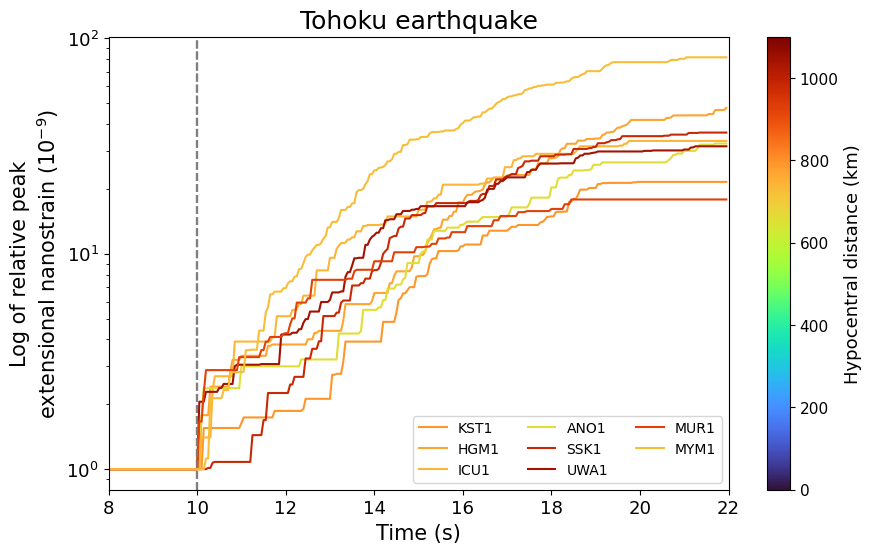

In [3]:
cmap = plt.get_cmap('turbo', 1100) 

fig = plt.figure(figsize = (10,6), dpi = 100, facecolor = 'white', num = 1, clear = True)
ax = fig.add_subplot(111)

for i in range(len(snr_array)):

    sta = snr_array['Station_name'][i]
    hypdist = float(snr_array['hyp_dist_km'][i])
    int_hypdist = int(hypdist)
    snr = float(snr_array['rms_snr'][i])

    # Peak strain data
    pst = read(path + 'filtered_peak_post_p/' + str(sta) + '.mseed')

    pst_times = pst[0].times()
    pst_data = pst[0].data
    samp_rate = pst[0].stats.sampling_rate

    low_xlim_sec = 8
    high_xlim_sec = 22

    low_xlim_samp = int(low_xlim_sec * samp_rate)
    high_xlim_samp = int(high_xlim_sec * samp_rate)

    # Move the flat line at the beginning of each timeseries to the same level

    norm_data = np.copy(pst_data)
    norm_level = pst_data[0]
#         print(norm_level)
    norm_data = norm_data - norm_level + 1*10**-9 # Subtract the starting value, add 10^-9 to set at 10^0 on nanostrain plot

    # Plot stations
    # ax.plot(pst_times, pst_data*10**9, color = cmap(int_hypdist-1), label = sta)
    ax.plot(pst_times[low_xlim_samp:high_xlim_samp], norm_data[low_xlim_samp:high_xlim_samp]*10**9, color = cmap(int_hypdist-1), label = sta)
    ax.set_yscale('log')
    ax.set_ylabel('Log of relative peak\nextensional nanostrain ($10^{-9}$)', fontsize = 15)
    ax.set_xlabel('Time (s)', fontsize = 15)
    ax.set_xlim(low_xlim_sec,high_xlim_sec)
    if high_xlim_sec <= 30:
        ax.axvline(x = 10, color = 'gray', linestyle = '--', alpha = 0.5)
    ax.tick_params(labelsize = 13)

ax.set_title('Tohoku earthquake', fontsize = 18)
cbar = fig.colorbar(plt.cm.ScalarMappable(norm = Normalize(0, 1100), cmap = cmap), ax = ax)
cbar.ax.tick_params(labelsize = 11)
cbar.ax.set_ylabel(ylabel = 'Hypocentral distance (km)', fontsize = 13)
ax.legend(loc = 'lower right', ncol = 3, fontsize = 10)
    
plt.show();

#     # Create folder for the event
#     fig_save_dir = path_to_files + 'figures/filtered_peak_strain_plots/NA_M6_500km/leveled_at_p_arrival/by_event_cmap_hypdist/' + str(high_xlim_sec) + 's_limit/'
# #         print(fig_save_dir)
#     if os.path.isdir(fig_save_dir):
#         pass
#     else:
#         os.makedirs(fig_save_dir)

#     plt.savefig(fig_save_dir + str(eq_id) + '.png', format = 'PNG')
#     plt.close();


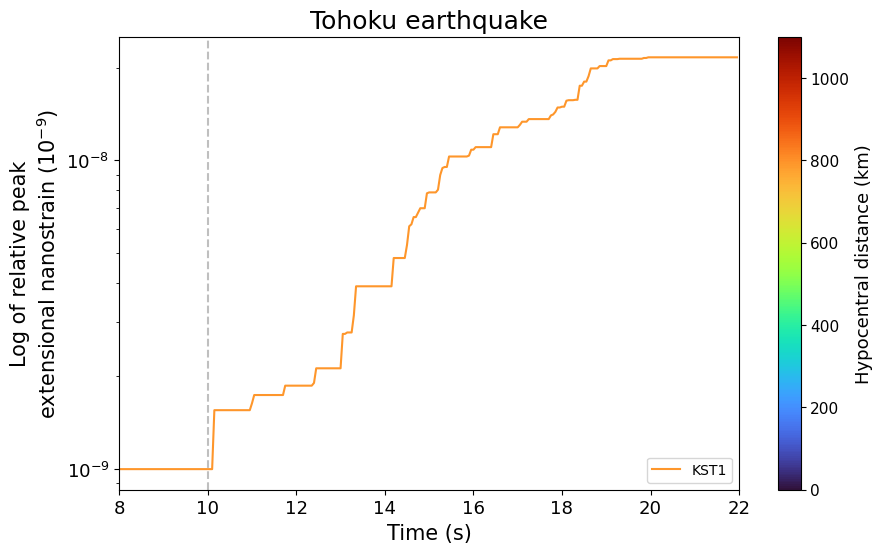

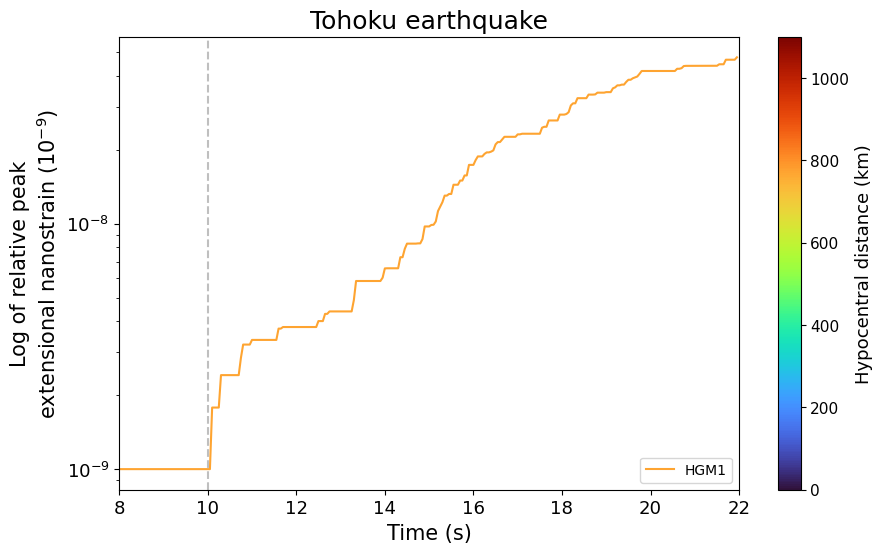

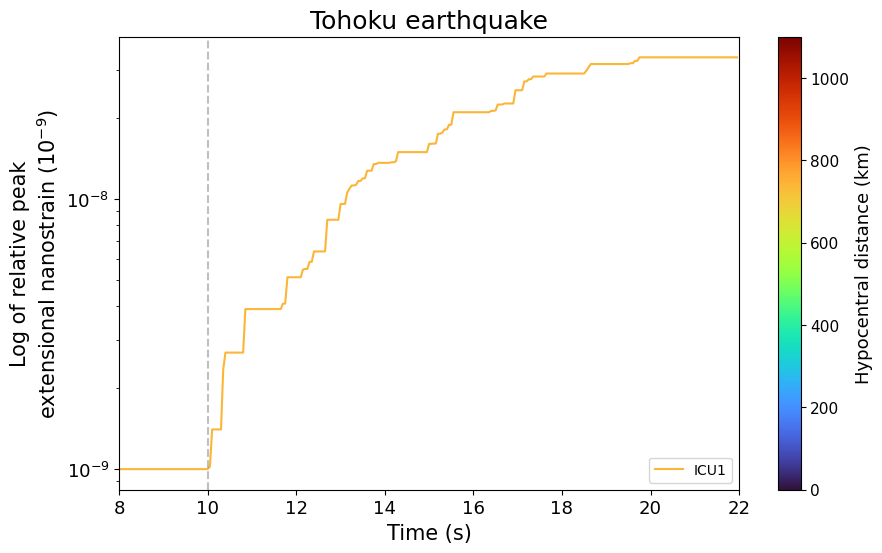

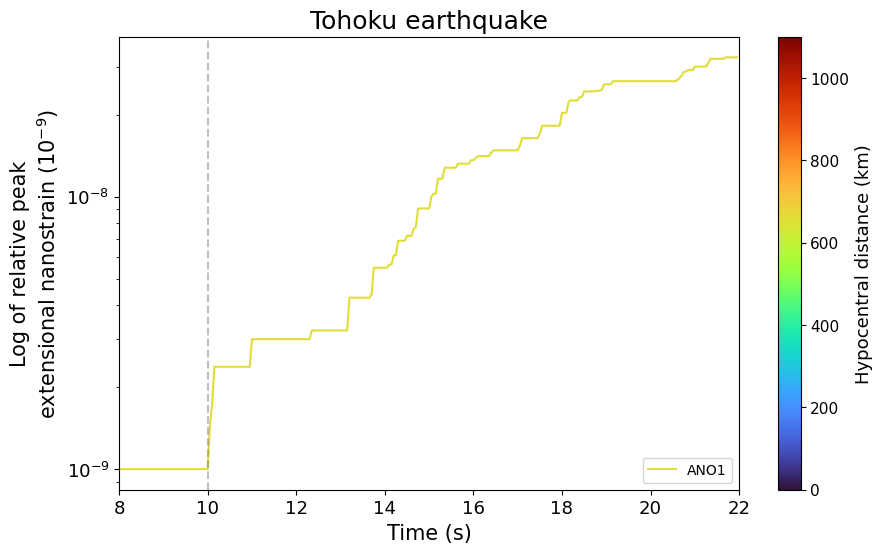

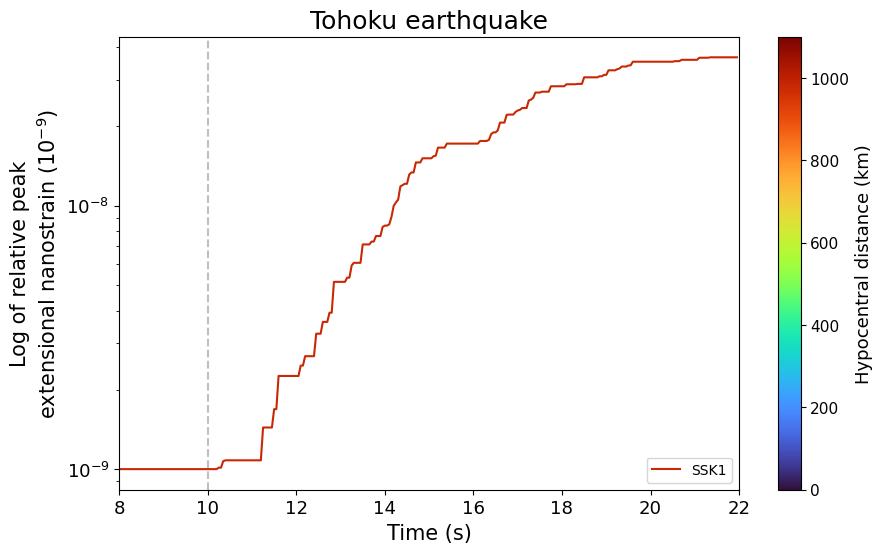

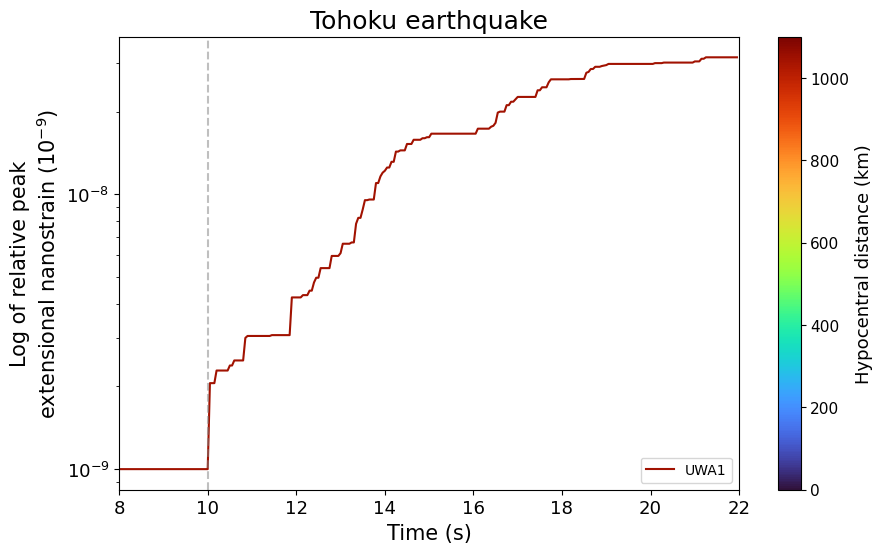

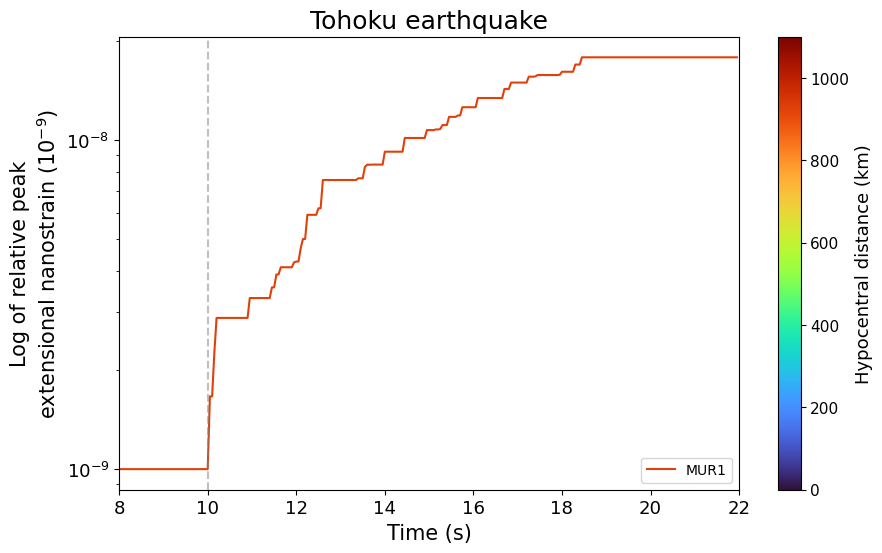

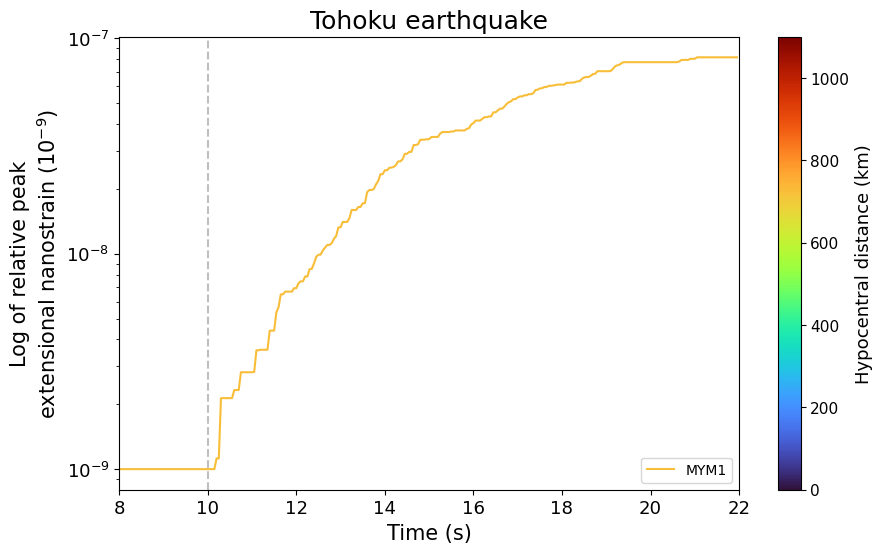

In [12]:
cmap = plt.get_cmap('turbo', 1100) 

for i in range(len(snr_array)):
    
    fig = plt.figure(figsize = (10,6), dpi = 100, facecolor = 'white', num = 1, clear = True)
    ax = fig.add_subplot(111)

    sta = snr_array['Station_name'][i]
    hypdist = float(snr_array['hyp_dist_km'][i])
    int_hypdist = int(hypdist)
    snr = float(snr_array['rms_snr'][i])

    # Peak strain data
    pst = read(path + 'filtered_peak_post_p/' + str(sta) + '.mseed')

    pst_times = pst[0].times()
    pst_data = pst[0].data
    samp_rate = pst[0].stats.sampling_rate

    low_xlim_sec = 8
    high_xlim_sec = 22

    low_xlim_samp = int(low_xlim_sec * samp_rate)
    high_xlim_samp = int(high_xlim_sec * samp_rate)

    # Move the flat line at the beginning of each timeseries to the same level

    norm_data = np.copy(pst_data)
    norm_level = pst_data[0]
#         print(norm_level)
    norm_data = norm_data - norm_level + 1*10**-9 # Subtract the starting value, add 10^-9 to set at 10^0 on nanostrain plot

    # Plot stations
    # ax.plot(pst_times, pst_data*10**9, color = cmap(int_hypdist-1), label = sta)
    ax.plot(pst_times[low_xlim_samp:high_xlim_samp], norm_data[low_xlim_samp:high_xlim_samp], color = cmap(int_hypdist-1), label = sta)
    # ax.plot(pst_times[low_xlim_samp:high_xlim_samp], pst_data[low_xlim_samp:high_xlim_samp], color = cmap(int_hypdist-1), label = sta)
    ax.set_yscale('log')
    ax.set_ylabel('Log of relative peak\nextensional nanostrain ($10^{-9}$)', fontsize = 15)
    ax.set_xlabel('Time (s)', fontsize = 15)
    ax.set_xlim(low_xlim_sec,high_xlim_sec)
    if high_xlim_sec <= 30:
        ax.axvline(x = 10, color = 'gray', linestyle = '--', alpha = 0.5)
    ax.tick_params(labelsize = 13)

    ax.set_title('Tohoku earthquake', fontsize = 18)
    cbar = fig.colorbar(plt.cm.ScalarMappable(norm = Normalize(0, 1100), cmap = cmap), ax = ax)
    cbar.ax.tick_params(labelsize = 11)
    cbar.ax.set_ylabel(ylabel = 'Hypocentral distance (km)', fontsize = 13)
    ax.legend(loc = 'lower right', ncol = 3, fontsize = 10)

    plt.show();

#     # Create folder for the event
#     fig_save_dir = path_to_files + 'figures/filtered_peak_strain_plots/NA_M6_500km/leveled_at_p_arrival/by_event_cmap_hypdist/' + str(high_xlim_sec) + 's_limit/'
# #         print(fig_save_dir)
#     if os.path.isdir(fig_save_dir):
#         pass
#     else:
#         os.makedirs(fig_save_dir)

#     plt.savefig(fig_save_dir + str(eq_id) + '.png', format = 'PNG')
#     plt.close();


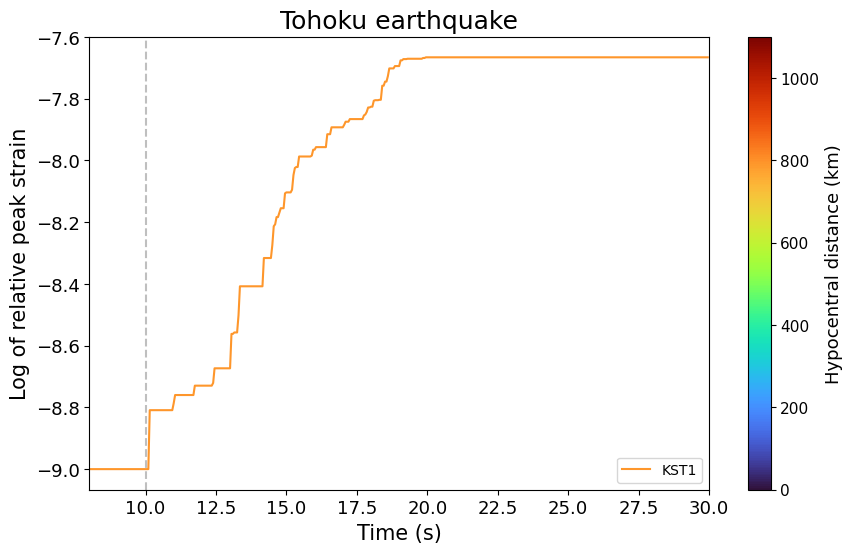

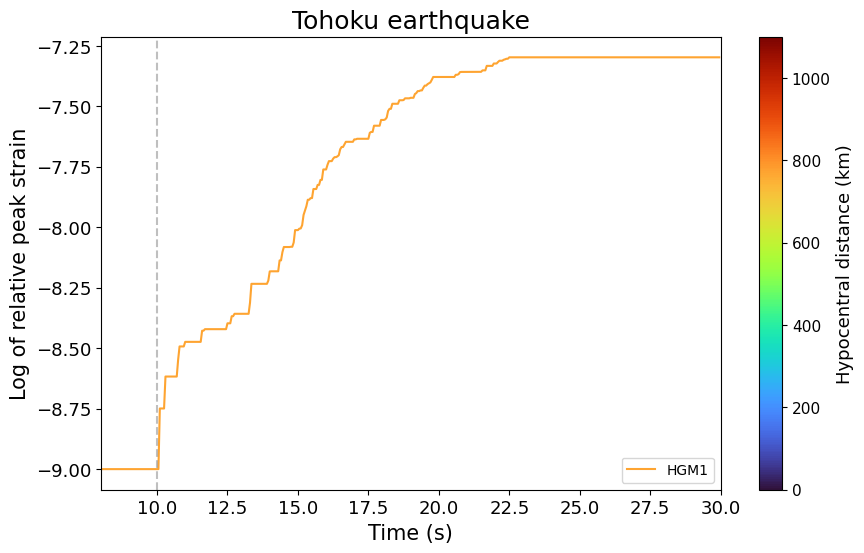

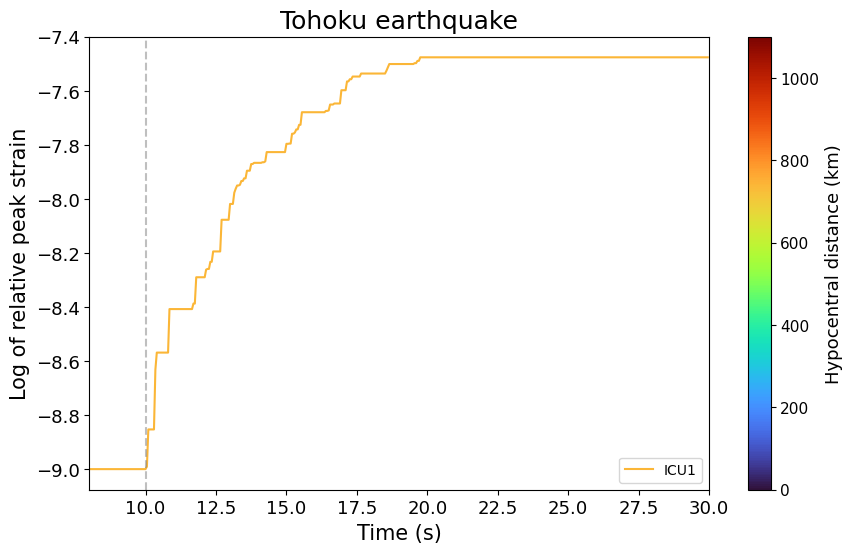

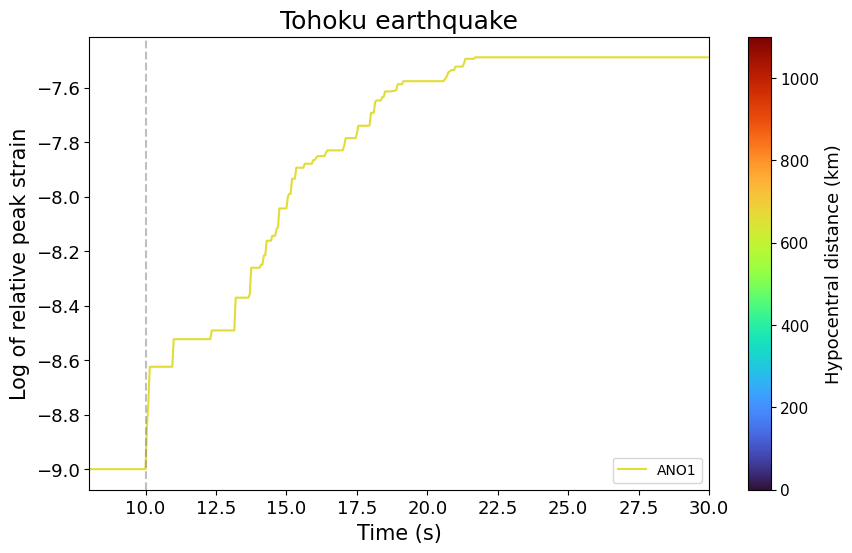

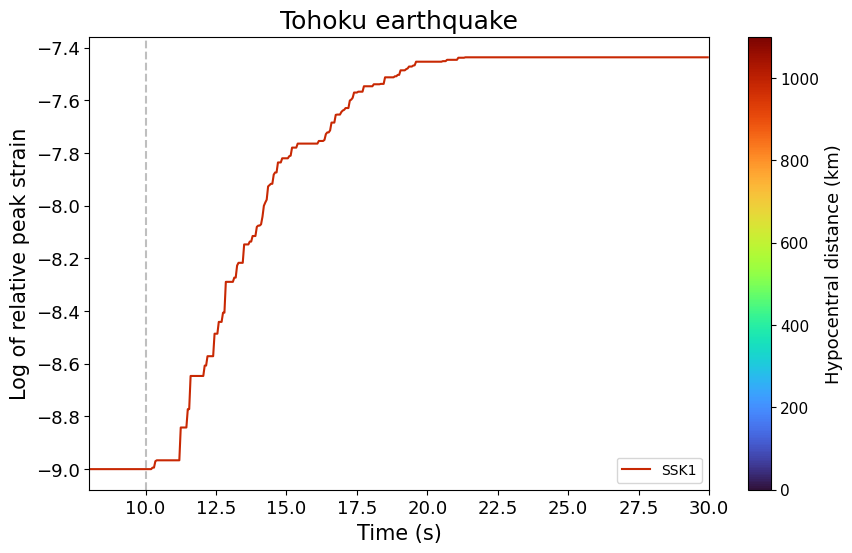

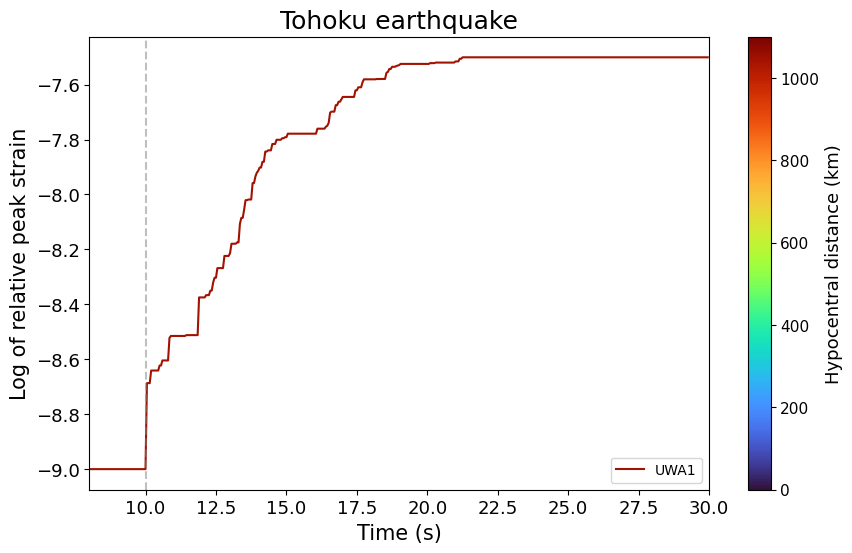

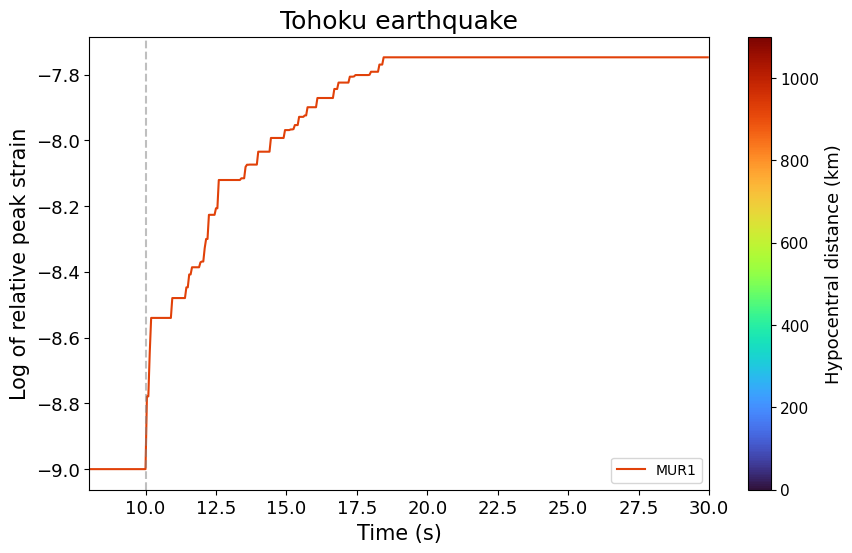

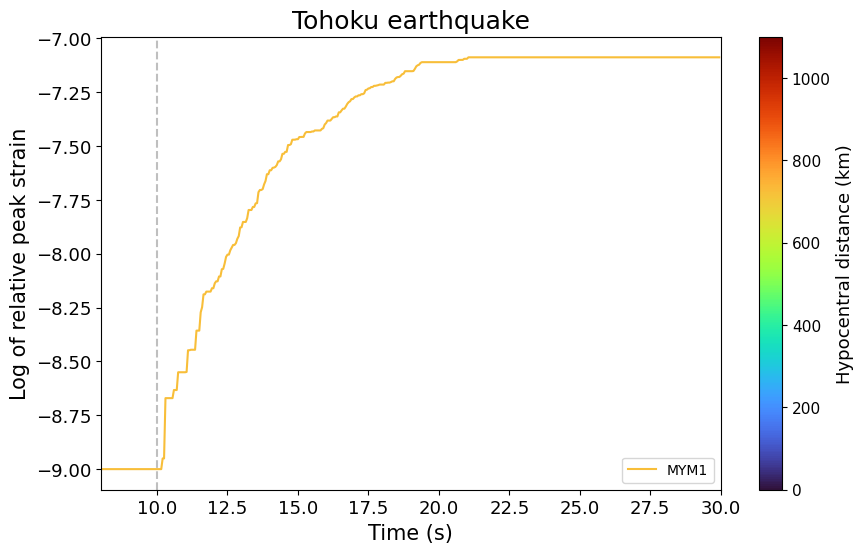

In [19]:
cmap = plt.get_cmap('turbo', 1100) 

# fig = plt.figure(figsize = (10,6), dpi = 100, facecolor = 'white', num = 1, clear = True)
# ax = fig.add_subplot(111)

for i in range(len(snr_array)):
    
    fig = plt.figure(figsize = (10,6), dpi = 100, facecolor = 'white', num = 1, clear = True)
    ax = fig.add_subplot(111)

    sta = snr_array['Station_name'][i]
    hypdist = float(snr_array['hyp_dist_km'][i])
    int_hypdist = int(hypdist)
    snr = float(snr_array['rms_snr'][i])

    # Peak strain data
    pst = read(path + 'filtered_peak_post_p/' + str(sta) + '.mseed')

    pst_times = pst[0].times()
    pst_data = pst[0].data
    log10_data = np.log10(pst_data)
    samp_rate = pst[0].stats.sampling_rate

    low_xlim_sec = 8
    high_xlim_sec = 30

    low_xlim_samp = int(low_xlim_sec * samp_rate)
    high_xlim_samp = int(high_xlim_sec * samp_rate)

    # Move the flat line at the beginning of each timeseries to the same level

    norm_data = np.copy(pst_data)
    norm_level = pst_data[0]
#         print(norm_level)
    norm_data = norm_data - norm_level + 1*10**-9 # Subtract the starting value, add 10^-9 to set at 10^0 on nanostrain plot

    norm_log10data = np.log10(norm_data)
    
    # Plot stations
    # ax.plot(pst_times, pst_data*10**9, color = cmap(int_hypdist-1), label = sta)
    # ax.plot(pst_times[low_xlim_samp:high_xlim_samp], norm_data[low_xlim_samp:high_xlim_samp]*10**9, color = cmap(int_hypdist-1), label = sta)
    ax.plot(pst_times[low_xlim_samp:high_xlim_samp], norm_log10data[low_xlim_samp:high_xlim_samp], color = cmap(int_hypdist-1), label = sta)
    # ax.set_yscale('log')
    ax.set_ylabel('Log of relative peak strain', fontsize = 15)
    ax.set_xlabel('Time (s)', fontsize = 15)
    ax.set_xlim(low_xlim_sec,high_xlim_sec)
    if high_xlim_sec <= 30:
        ax.axvline(x = 10, color = 'gray', linestyle = '--', alpha = 0.5)
    ax.tick_params(labelsize = 13)

    ax.set_title('Tohoku earthquake', fontsize = 18)
    cbar = fig.colorbar(plt.cm.ScalarMappable(norm = Normalize(0, 1100), cmap = cmap), ax = ax)
    cbar.ax.tick_params(labelsize = 11)
    cbar.ax.set_ylabel(ylabel = 'Hypocentral distance (km)', fontsize = 13)
    ax.legend(loc = 'lower right', ncol = 3, fontsize = 10)

    plt.show();

#     # Create folder for the event
#     fig_save_dir = path_to_files + 'figures/filtered_peak_strain_plots/NA_M6_500km/leveled_at_p_arrival/by_event_cmap_hypdist/' + str(high_xlim_sec) + 's_limit/'
# #         print(fig_save_dir)
#     if os.path.isdir(fig_save_dir):
#         pass
#     else:
#         os.makedirs(fig_save_dir)

#     plt.savefig(fig_save_dir + str(eq_id) + '.png', format = 'PNG')
#     plt.close();


199
9.95


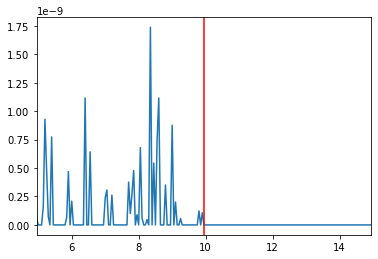

250
12.5


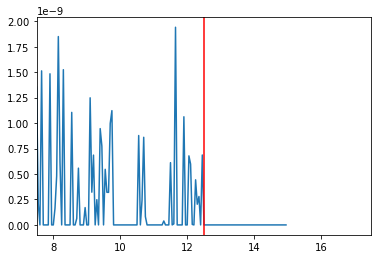

195
9.75


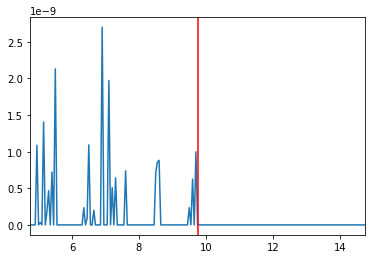

234
11.7


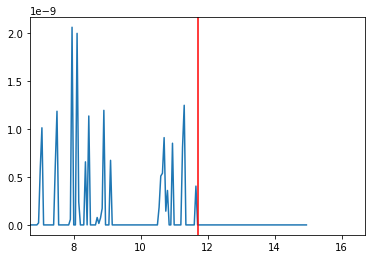

227
11.35


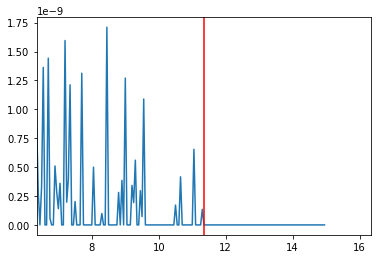

225
11.25


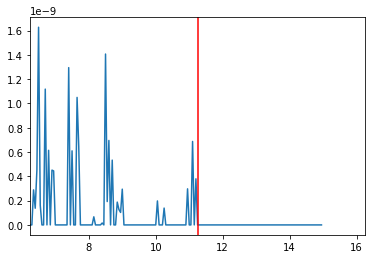

169
8.45


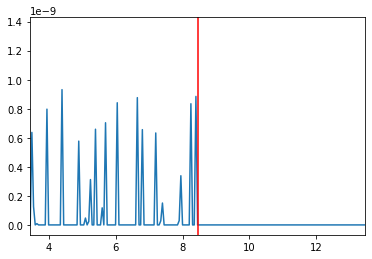

221
11.05


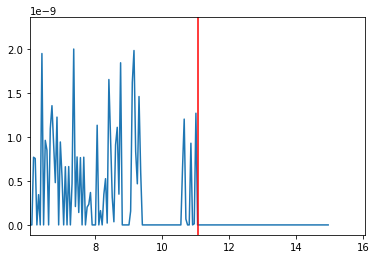

In [38]:
# Find where each station flattens out 

flat_times = []

for i in range(len(snr_array)):

    sta = snr_array['Station_name'][i]

    # Peak strain data
    pst = read(path + 'filtered_peak_post_p/' + str(sta) + '.mseed')
    # pst.plot()
    
    old_start = pst[0].stats.starttime
    new_start = old_start + 10
    new_end = old_start + 25
    
    trim_pst = pst.trim(starttime = new_start, endtime = new_end, pad = True, fill_value = 0)
    # trim_pst.plot()
    
    diff_trim = np.diff(trim_pst[0].data)
    diff_times = pst[0].times()[:-1]
    
    j = np.where(diff_trim != 0)[0]
    flat_start_idx = j[-1]+1
    print(flat_start_idx)
    flat_start_time = diff_times[flat_start_idx]
    print(flat_start_time)
    
    plt.plot(diff_times, diff_trim)
    plt.axvline(flat_start_time, color = 'red')
    plt.xlim(flat_start_time-5, flat_start_time+5)
    plt.show()
    
    flat_times.append(flat_start_time)
    
snr_array['flat_start_secs_after_p'] = flat_times   
    

In [39]:
snr_array

,Station_name,latitude,longitude,azimuth(S1),azimuth(S2),azimuth(S3),azimuth(S4),hyp_dist_km,rms_snr,flat_start_secs_after_p
0,KST1,33.5201,135.8363,310,40,85,175,792.746765,1.273396,9.95
1,HGM1,33.8675,135.7318,337,67,112,202,773.809644,1.139778,12.50
2,ICU1,33.9001,136.1379,141,231,276,6,743.491829,1.203692,9.75
3,ANO1,34.7870,136.4019,38,128,173,263,661.251185,1.113420,11.70
4,SSK1,33.3896,133.3229,355,85,130,220,981.546244,1.285971,11.35
5,UWA1,33.3859,132.4823,222,312,357,87,1045.683453,1.282839,11.25
6,MUR1,33.2856,134.1563,147,237,282,12,927.200827,1.258307,8.45
7,MYM1,34.1123,136.1815,237,327,12,102,724.694237,1.134499,11.05


In [40]:
snr_array.to_csv(path + 'stations_hypdists_snrs_flatsecs.list', index = False)

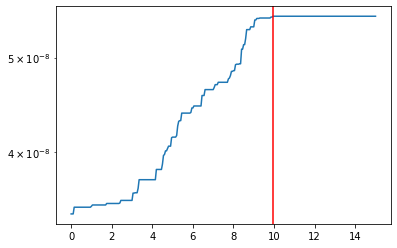

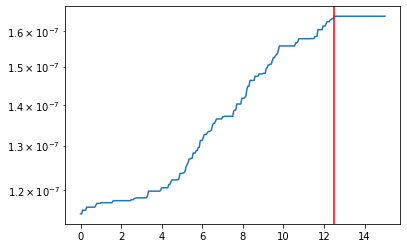

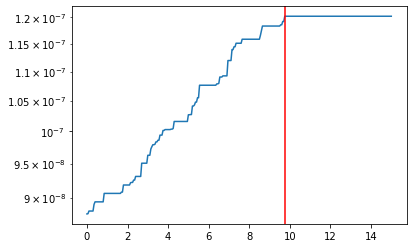

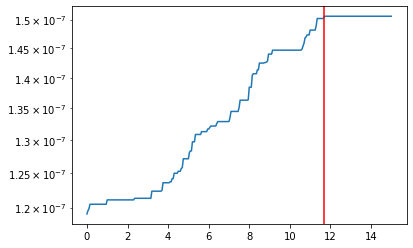

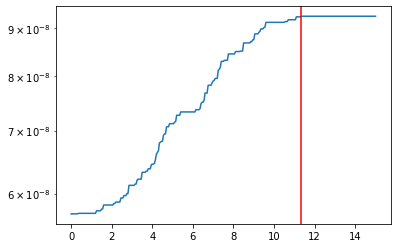

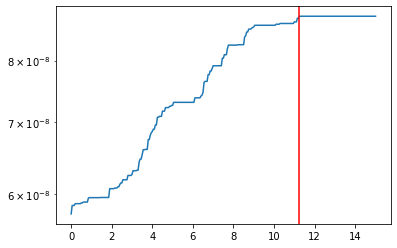

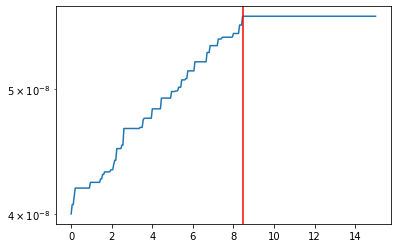

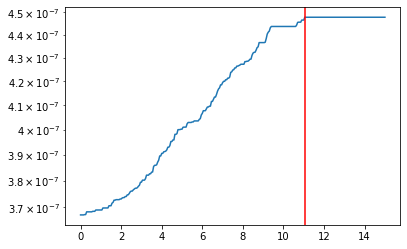

In [41]:
for i in range(len(snr_array)):

    sta = snr_array['Station_name'][i]
    trans_time = snr_array['flat_start_secs_after_p'][i]

    # Peak strain data
    pst = read(path + 'filtered_peak_post_p/' + str(sta) + '.mseed')
    # pst.plot()
    
    old_start = pst[0].stats.starttime
    new_start = old_start + 10
    new_end = old_start + 25
    
    trim_pst = pst.trim(starttime = new_start, endtime = new_end, pad = True, fill_value = 0)
    
    plt.plot(trim_pst[0].times(), trim_pst[0].data)
    plt.axvline(trans_time, color = 'red')
    plt.semilogy()
    plt.show()